# RECOMENDATION SYSTEMS

## OBJECTIVE:
## Build a supervised classification model to predict if one person will earn more or less than 50.000 USD per year

### 0. Data ingestion

In [43]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
import os
os.getcwd()

'/workspaces/Wendy-2025-DS-Sistemas-de-Recomendaci-n---Tu-Futuro-seg-n-la-Data/src'

In [45]:
df_income = pd.read_csv("/workspaces/Wendy-2025-DS-Sistemas-de-Recomendaci-n---Tu-Futuro-seg-n-la-Data/data/raw/adult-census-income.csv")

### 1. Data set general information

In [46]:
df_income

,Age,Workclass,fnlwgt,Education,Education-num,marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1    Workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    Education       32561 non-null  object
 4    Education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    Occupation      32561 non-null  object
 7    Relationship    32561 non-null  object
 8    Race            32561 non-null  object
 9    Sex             32561 non-null  object
 10   Capital-gain    32561 non-null  int64 
 11   Capital-loss    32561 non-null  int64 
 12   Hours-per-week  32561 non-null  int64 
 13   Native-country  32561 non-null  object
 14   Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [48]:
df_income.duplicated().sum()

24

In [49]:
df_income[df_income.duplicated()]

,Age,Workclass,fnlwgt,Education,Education-num,marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [50]:
df_income.drop_duplicates(inplace = True)

In [51]:
df_income.shape

(32537, 15)

In [52]:
missing_values = df_income.isnull().sum()
missing_values

Age                0
 Workclass         0
 fnlwgt            0
 Education         0
 Education-num     0
 marital-status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Capital-gain      0
 Capital-loss      0
 Hours-per-week    0
 Native-country    0
 Income            0
dtype: int64

<Axes: >

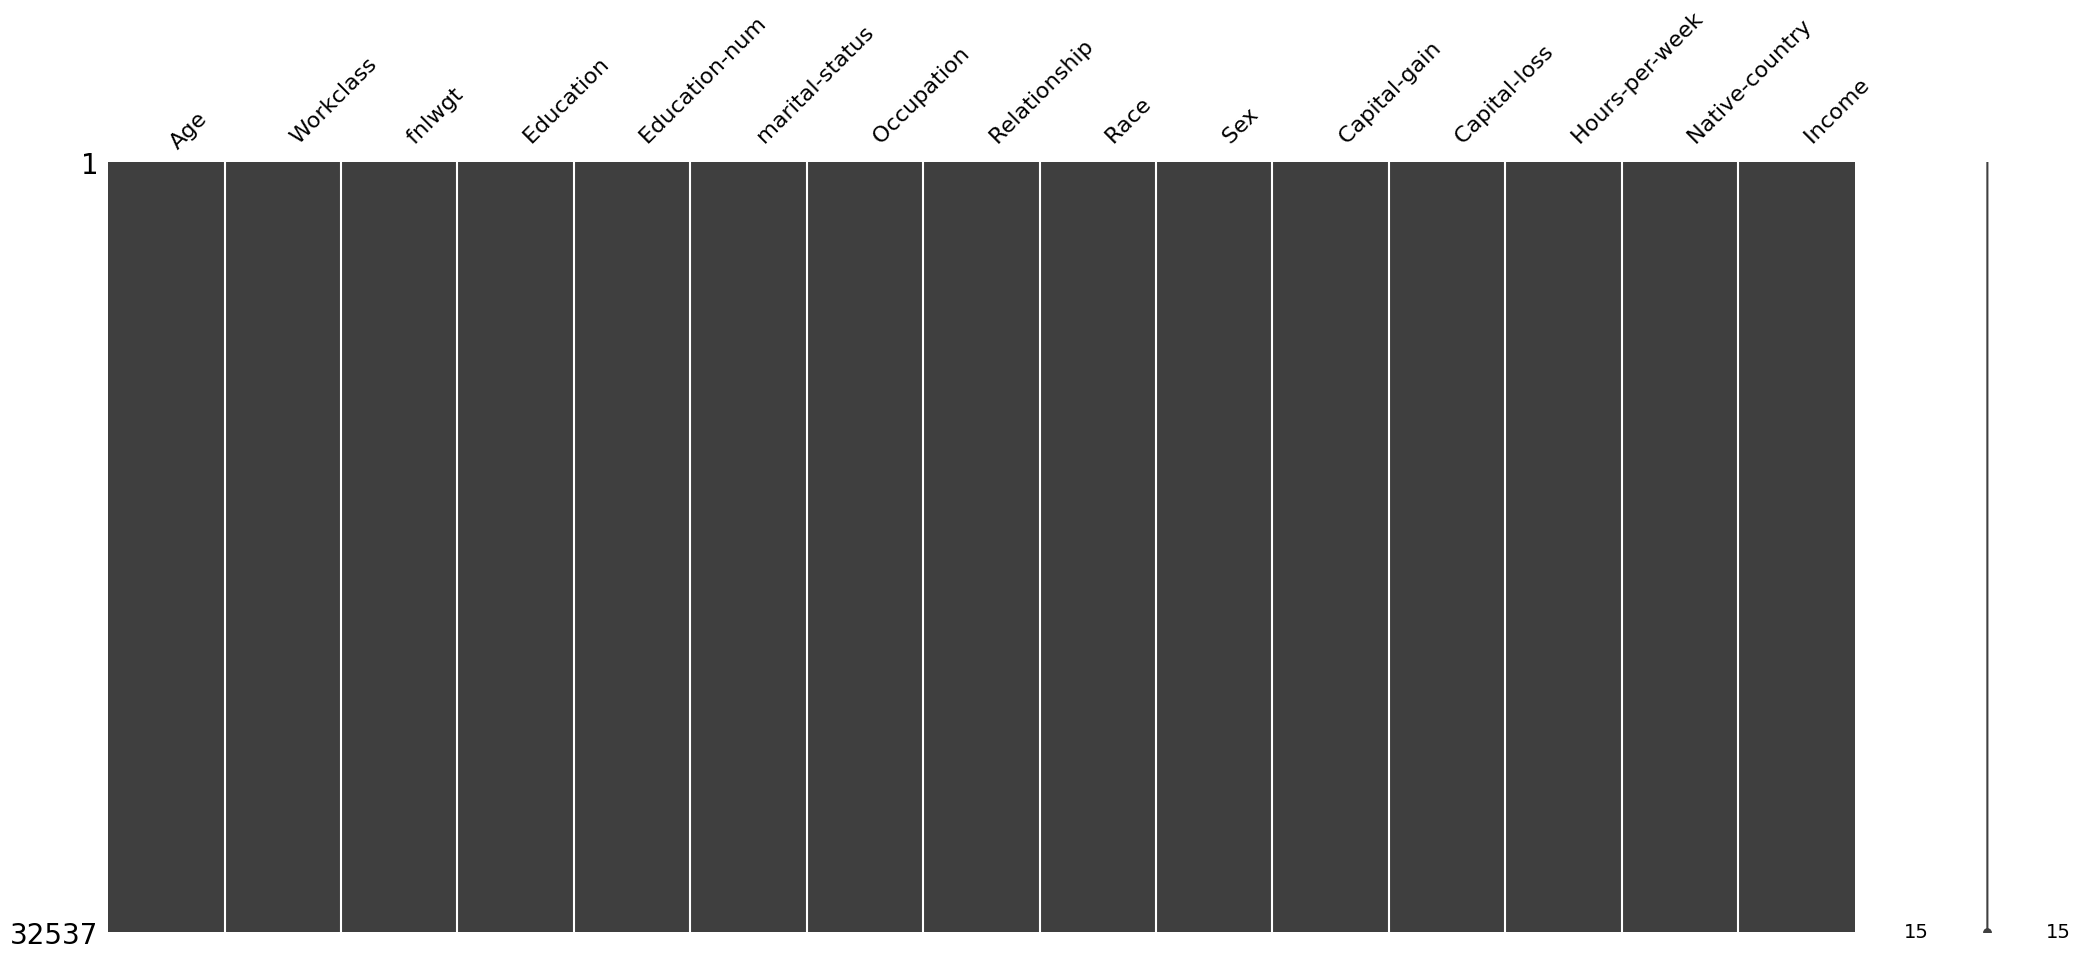

In [53]:
msno.matrix(df_income)

### 2. Variable asignation

In [54]:
X = df_income.drop(" Income", axis=1)
y = df_income[" Income"]

In [55]:
# Mostrar los nombres exactos de las columnas para identificar 'Income'
print(df_income.columns)
# Intenta eliminar la columna con y sin espacio
for col in df_income.columns:
    if col.strip().lower() == 'income':
        df_income = df_income.drop(columns=[col])
        print(f"Columna '{col}' eliminada.")
        break
else:
    print("No se encontró la columna 'Income' ni variantes.")
# Muestra el DataFrame para verificar que se eliminó
df_income.head()

Index(['Age', ' Workclass', ' fnlwgt', ' Education', ' Education-num',
       ' marital-status', ' Occupation', ' Relationship', ' Race', ' Sex',
       ' Capital-gain', ' Capital-loss', ' Hours-per-week', ' Native-country',
       ' Income'],
      dtype='object')
Columna ' Income' eliminada.


,Age,Workclass,fnlwgt,Education,Education-num,marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### 3. Categorical variables transformation

In [56]:
df_income

,Age,Workclass,fnlwgt,Education,Education-num,marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [57]:
categorical_cols = df_income.select_dtypes(include = ["object", "category"]).columns
df_income = pd.get_dummies(df_income, columns = categorical_cols)

### 4. Numerical variables normalisation

In [58]:
numeric_cols = df_income.select_dtypes(include = ["int64", "float64"]).columns
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_income)
df_scaled = pd.DataFrame(df_scaled, columns = df_income.columns)
df_scaled

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 5. Data division

In [59]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_test, X_anon, y_test, y_anon = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)
X_train.shape, X_test.shape, X_anon.shape, df_scaled.shape

((19522, 14), (6507, 14), (6508, 14), (32537, 108))

### 6. Logistic Regression

#### 6.0. Data Types verification:

In [61]:
print(X_train.dtypes)

Age                 int64
 Workclass         object
 fnlwgt             int64
 Education         object
 Education-num      int64
 marital-status    object
 Occupation        object
 Relationship      object
 Race              object
 Sex               object
 Capital-gain       int64
 Capital-loss       int64
 Hours-per-week     int64
 Native-country    object
dtype: object


#### 6.1. Categorical to numerical conversion:

In [63]:
X_encode = pd.get_dummies(X, drop_first = True)

#### 6.2. Model retraining:

In [64]:
X_train, X_test, X_anon = X_encode.loc[X_train.index], X_encode.loc[X_test.index], X_encode.loc[X_anon.index]
X_train.shape, X_test.shape, X_anon.shape

((19522, 100), (6507, 100), (6508, 100))

In [65]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 7. Accuracy

In [66]:
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.8380205932073151
